In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [33]:
df_data_historica = pd.read_csv('https://raw.githubusercontent.com/thepycoach/fifa-world-cup-2022-prediction/refs/heads/main/data/fifa_worldcup_matches.csv')
df_data_historica

,home,score,away,year
0,France,4–1,Mexico,1930
1,Argentina,1–0,France,1930
2,Chile,3–0,Mexico,1930
3,Chile,1–0,France,1930
4,Argentina,6–3,Mexico,1930
...,...,...,...,...
452,Russia,2–2 (a.e.t.),Croatia,2018
453,France,1–0,Belgium,2018
454,Croatia,2–1 (a.e.t.),England,2018
455,Belgium,2–0,England,2018


In [34]:
df_fixture = pd.read_csv('https://raw.githubusercontent.com/thepycoach/fifa-world-cup-2022-prediction/refs/heads/main/data/fifa_worldcup_fixture.csv')
df_fixture

,home,score,away,year
0,Qatar,Match 1,Ecuador,2022
1,Senegal,Match 2,Netherlands,2022
2,Qatar,Match 18,Senegal,2022
3,Netherlands,Match 19,Ecuador,2022
4,Ecuador,Match 35,Senegal,2022
...,...,...,...,...
59,Winners Match 51,Match 59,Winners Match 52,2022
60,Winners Match 57,Match 61,Winners Match 58,2022
61,Winners Match 59,Match 62,Winners Match 60,2022
62,Losers Match 61,Match 63,Losers Match 62,2022


In [35]:
df_data_faltante = pd.read_csv('https://raw.githubusercontent.com/thepycoach/fifa-world-cup-2022-prediction/refs/heads/main/data/fifa_worldcup_missing_data.csv')
df_data_faltante

,home,score,away,year
0,Mexico,0–0,Soviet Union,1970
1,Belgium,3–0,El Salvador,1970
2,Soviet Union,4–1,Belgium,1970
3,Mexico,4–0,El Salvador,1970
4,Soviet Union,2–0,El Salvador,1970
...,...,...,...,...
503,Spain,0–1,Switzerland,2010
504,Chile,1–0,Switzerland,2010
505,Spain,2–0,Honduras,2010
506,Chile,1–2,Spain,2010


# Limpieza de Datos

## Limpieando fixture

In [36]:
df_fixture.isnull().sum()

,0
home,0
score,0
away,0
year,0


In [37]:
df_fixture['home'] = df_fixture['home'].str.strip()
df_fixture['away'] = df_fixture['away'].str.strip()

## Limpiando df_missing_data y agregandolo a df_data_historica

In [38]:
df_data_faltante[df_data_faltante['home'].isnull()]

,home,score,away,year
396,NaN,NaN,NaN,2010
397,NaN,NaN,NaN,2010
398,NaN,NaN,NaN,2010
399,NaN,NaN,NaN,2010
400,NaN,NaN,NaN,2010
...,...,...,...,...
455,NaN,NaN,NaN,2010
456,NaN,NaN,NaN,2010
457,NaN,NaN,NaN,2010
458,NaN,NaN,NaN,2010


In [39]:
df_data_faltante.dropna(inplace=True)

In [40]:
df_data_faltante.isnull().sum()

,0
home,0
score,0
away,0
year,0


In [41]:
df_data_historica =pd.concat([df_data_historica, df_data_faltante], ignore_index=True)
df_data_historica

,home,score,away,year
0,France,4–1,Mexico,1930
1,Argentina,1–0,France,1930
2,Chile,3–0,Mexico,1930
3,Chile,1–0,France,1930
4,Argentina,6–3,Mexico,1930
...,...,...,...,...
896,Spain,0–1,Switzerland,2010
897,Chile,1–0,Switzerland,2010
898,Spain,2–0,Honduras,2010
899,Chile,1–2,Spain,2010


In [42]:
df_data_historica.drop_duplicates(inplace=True)
df_data_historica.sort_values('year', inplace=True)
df_data_historica

,home,score,away,year
0,France,4–1,Mexico,1930
17,Uruguay,4–2,Argentina,1930
16,Uruguay,6–1,Yugoslavia,1930
15,Argentina,6–1,United States,1930
14,Paraguay,1–0,Belgium,1930
...,...,...,...,...
419,Brazil,2–0,Costa Rica,2018
420,Serbia,1–2,Switzerland,2018
421,Serbia,0–2,Brazil,2018
408,France,1–0,Peru,2018


## Limpiando df_data_historica

In [43]:
df_data_historica['home'].str.contains('Sweden').sum()

29

In [44]:
df_data_historica[df_data_historica['home'].str.contains('Sweden')]

,home,score,away,year
23,Sweden,3–2,Argentina,1934
46,Sweden,8–0,Cuba,1938
37,Sweden,w/o[a],Austria,1938
66,Sweden,3–2,Italy,1950
67,Sweden,2–2,Paraguay,1950
74,Sweden,3–1,Spain,1950
134,Sweden,3–1,West Germany,1958
131,Sweden,2–0,Soviet Union,1958
119,Sweden,0–0,Wales,1958
118,Sweden,2–1,Hungary,1958


In [45]:
df_data_historica[df_data_historica['home'].str.contains('Sweden') &
                  df_data_historica['away'].str.contains('Austria')]

,home,score,away,year
37,Sweden,w/o[a],Austria,1938


In [46]:
index_eliminar = df_data_historica[df_data_historica['home'].str.contains('Sweden') &
                  df_data_historica['away'].str.contains('Austria')].index

In [47]:
df_data_historica.drop(index=index_eliminar, inplace=True)

In [48]:
df_data_historica['score'] = df_data_historica['score'].str.replace('[^\d–]', '', regex=True)

In [49]:
df_data_historica['score']

,score
0,4–1
17,4–2
16,6–1
15,6–1
14,1–0
...,...
419,2–0
420,1–2
421,0–2
408,1–0


In [50]:
df_data_historica['home'] = df_data_historica['home'].str.strip()
df_data_historica['away'] = df_data_historica['away'].str.strip()

In [51]:
df_data_historica[['HomeGoals', 'AwayGoals']] = df_data_historica['score'].str.split('–', expand=True)
df_data_historica

,home,score,away,year,HomeGoals,AwayGoals
0,France,4–1,Mexico,1930,4,1
17,Uruguay,4–2,Argentina,1930,4,2
16,Uruguay,6–1,Yugoslavia,1930,6,1
15,Argentina,6–1,United States,1930,6,1
14,Paraguay,1–0,Belgium,1930,1,0
...,...,...,...,...,...,...
419,Brazil,2–0,Costa Rica,2018,2,0
420,Serbia,1–2,Switzerland,2018,1,2
421,Serbia,0–2,Brazil,2018,0,2
408,France,1–0,Peru,2018,1,0


In [52]:
df_data_historica.drop('score', axis=1, inplace=True)
df_data_historica.rename(columns={'home': 'HomeTeam', 'away': 'AwayTeam', 'year': 'Year'}, inplace=True)
df_data_historica

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals
0,France,Mexico,1930,4,1
17,Uruguay,Argentina,1930,4,2
16,Uruguay,Yugoslavia,1930,6,1
15,Argentina,United States,1930,6,1
14,Paraguay,Belgium,1930,1,0
...,...,...,...,...,...
419,Brazil,Costa Rica,2018,2,0
420,Serbia,Switzerland,2018,1,2
421,Serbia,Brazil,2018,0,2
408,France,Peru,2018,1,0


In [53]:
df_data_historica.dtypes

,0
HomeTeam,object
AwayTeam,object
Year,int64
HomeGoals,object
AwayGoals,object


In [54]:
df_data_historica = df_data_historica.astype({'HomeGoals': int, 'AwayGoals': int})
df_data_historica.dtypes

,0
HomeTeam,object
AwayTeam,object
Year,int64
HomeGoals,int64
AwayGoals,int64


In [55]:
df_data_historica['TotalGoals'] = df_data_historica['HomeGoals'] + df_data_historica['AwayGoals']
df_data_historica

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,France,Mexico,1930,4,1,5
17,Uruguay,Argentina,1930,4,2,6
16,Uruguay,Yugoslavia,1930,6,1,7
15,Argentina,United States,1930,6,1,7
14,Paraguay,Belgium,1930,1,0,1
...,...,...,...,...,...,...
419,Brazil,Costa Rica,2018,2,0,2
420,Serbia,Switzerland,2018,1,2,3
421,Serbia,Brazil,2018,0,2,2
408,France,Peru,2018,1,0,1


In [56]:
df_data_historica.to_csv('clean_fifa_worldcup_matches.csv', index=False)
df_fixture.to_csv('clean_fifa_worldcup_fixture.csv', index=False)

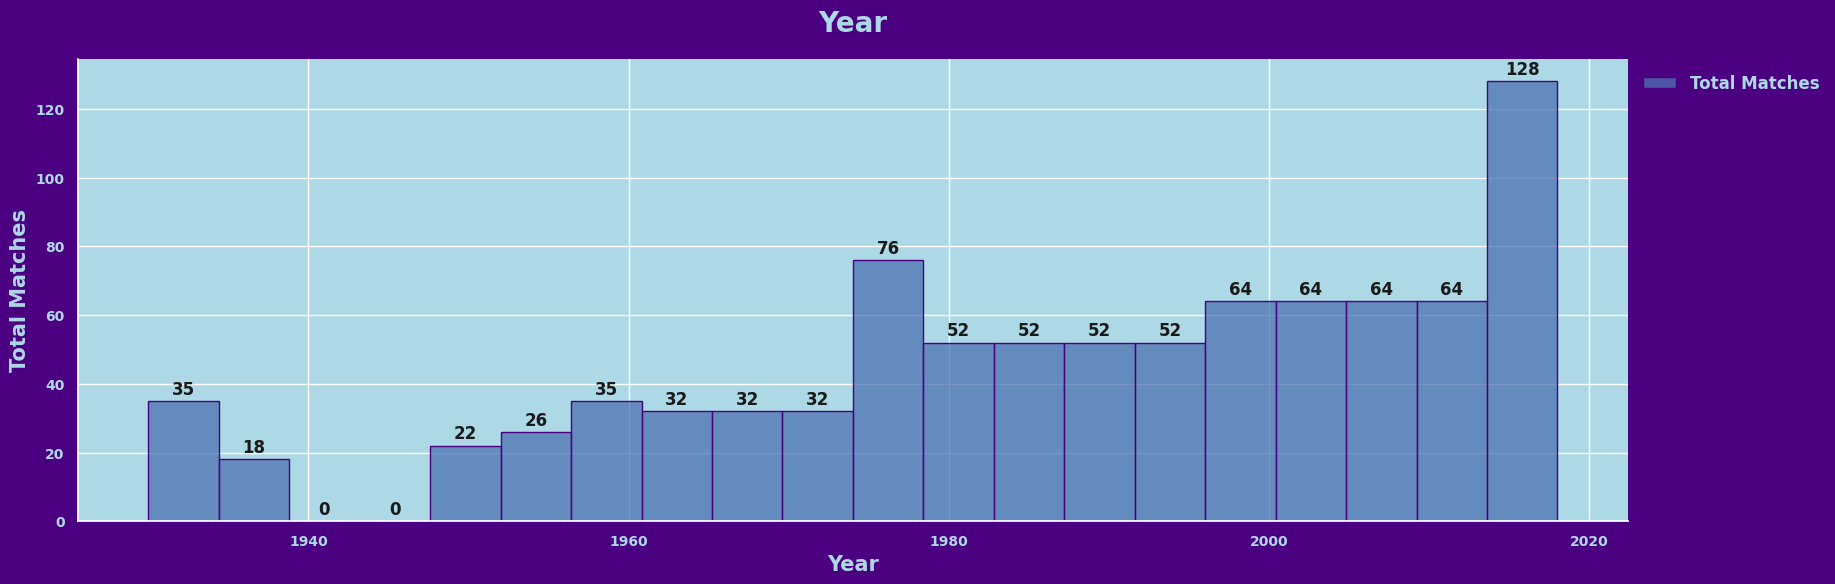

In [57]:
sns.set_style('darkgrid')
sns.set_theme(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'indigo'})
plt.figure(figsize=(20,6))
ax = sns.histplot(df_data_historica['Year'], edgecolor='indigo', bins=20)
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.title('Year', color='lightblue', size=20, weight='bold', pad=20)
plt.xlabel('Year', color='lightblue', size=15, weight='bold')
plt.ylabel('Total Matches', color='lightblue', size=15, weight='bold')
plt.xticks(color='lightblue', size=10, weight='bold')
plt.yticks(color='lightblue', size=10, weight='bold')
for container in ax.containers:
    ax.bar_label(container,
                label_type='edge',
                padding=2,
                color='k',
                fontsize=12,
                fontweight='bold',
                fmt='{:,.0f}'
    )
plt.legend(['Total Matches'],
           bbox_to_anchor=(1, 1),
           loc='upper left',
           frameon=False,
           labelcolor='lightblue',  # Set the color for the text in legend
           prop={'size': 12, 'weight': 'bold'} # Removed the 'color' key
           )
plt.show()

In [58]:
years = df_data_historica['Year'].unique().tolist()

In [59]:
print(years, end='')

[1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974, 1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018]

In [60]:
for year in years:
    print(f'En el año: {year}, se jugaron {len(df_data_historica[df_data_historica["Year"] == year])} partidos')
    print('--------------------------------------------|')

En el año: 1930, se jugaron 18 partidos
--------------------------------------------|
En el año: 1934, se jugaron 17 partidos
--------------------------------------------|
En el año: 1938, se jugaron 18 partidos
--------------------------------------------|
En el año: 1950, se jugaron 22 partidos
--------------------------------------------|
En el año: 1954, se jugaron 26 partidos
--------------------------------------------|
En el año: 1958, se jugaron 35 partidos
--------------------------------------------|
En el año: 1962, se jugaron 32 partidos
--------------------------------------------|
En el año: 1966, se jugaron 32 partidos
--------------------------------------------|
En el año: 1970, se jugaron 32 partidos
--------------------------------------------|
En el año: 1974, se jugaron 38 partidos
--------------------------------------------|
En el año: 1978, se jugaron 38 partidos
--------------------------------------------|
En el año: 1982, se jugaron 52 partidos
--------------

In [61]:
import pickle
from scipy.stats import poisson

In [62]:
dict_table = pickle.load(open('dict_table', 'rb'))
df_data_historica = pd.read_csv('clean_fifa_worldcup_matches.csv')
df_fixture = pd.read_csv('clean_fifa_worldcup_fixture.csv')

In [63]:
dict_table.keys()

dict_keys(['Group A', 'Group B', 'Group C', 'Group D', 'Group E', 'Group F', 'Group G', 'Group H'])

# Calcular fuerza del equipo

In [64]:
df_data_historica

,HomeTeam,AwayTeam,Year,HomeGoals,AwayGoals,TotalGoals
0,France,Mexico,1930,4,1,5
1,Uruguay,Argentina,1930,4,2,6
2,Uruguay,Yugoslavia,1930,6,1,7
3,Argentina,United States,1930,6,1,7
4,Paraguay,Belgium,1930,1,0,1
...,...,...,...,...,...,...
895,Brazil,Costa Rica,2018,2,0,2
896,Serbia,Switzerland,2018,1,2,3
897,Serbia,Brazil,2018,0,2,2
898,France,Peru,2018,1,0,1


In [65]:
df_home = df_data_historica.loc[:, ['HomeTeam','HomeGoals','AwayGoals']]
df_away = df_data_historica.loc[:, ['AwayTeam','HomeGoals','AwayGoals']]

In [66]:
df_home = df_home.rename(columns={'HomeTeam': 'Team', 'HomeGoals': 'GoalsScored', 'AwayGoals': 'GoalsConceded'})
df_away = df_away.rename(columns={'AwayTeam': 'Team', 'HomeGoals': 'GoalsConceded', 'AwayGoals': 'GoalsScored'})

In [67]:
df_home

,Team,GoalsScored,GoalsConceded
0,France,4,1
1,Uruguay,4,2
2,Uruguay,6,1
3,Argentina,6,1
4,Paraguay,1,0
...,...,...,...
895,Brazil,2,0
896,Serbia,1,2
897,Serbia,0,2
898,France,1,0


In [68]:
df_away

,Team,GoalsConceded,GoalsScored
0,Mexico,4,1
1,Argentina,4,2
2,Yugoslavia,6,1
3,United States,6,1
4,Belgium,1,0
...,...,...,...
895,Costa Rica,2,0
896,Switzerland,1,2
897,Brazil,0,2
898,Peru,1,0


In [69]:
df_team_strength = pd.concat([df_home, df_away], ignore_index=True).groupby('Team').mean()
df_team_strength

,GoalsScored,GoalsConceded
Team,,
Algeria,1.000000,1.461538
Angola,0.333333,0.666667
Argentina,1.691358,1.148148
Australia,0.812500,1.937500
Austria,1.482759,1.620690
...,...,...
Uruguay,1.553571,1.321429
Wales,0.800000,0.800000
West Germany,2.112903,1.241935


In [70]:
def predict_points(home, away):
    if home in df_team_strength.index and away in df_team_strength.index:
        # goals_scored * goals_conceded
        lamb_home = df_team_strength.at[home,'GoalsScored'] * df_team_strength.at[away,'GoalsConceded']
        lamb_away = df_team_strength.at[away,'GoalsScored'] * df_team_strength.at[home,'GoalsConceded']
        prob_home, prob_away, prob_draw = 0, 0, 0
        for x in range(0,11): #number of goals home team
            for y in range(0, 11): #number of goals away team
                p = poisson.pmf(x, lamb_home) * poisson.pmf(y, lamb_away)
                if x == y:
                    prob_draw += p
                elif x > y:
                    prob_home += p
                else:
                    prob_away += p
        points_home = 3 * prob_home + prob_draw
        points_away = 3 * prob_away + prob_draw
        return (points_home, points_away)
    else:
        return (0, 0)

In [71]:
predict_points('Argentina', 'Mexico')

(2.3129151525530505, 0.5378377125059863)

In [72]:
predict_points('England', 'Mexico')

(2.1802078037980426, 0.6329853593566852)

In [73]:
predict_points('Qatar (H)', 'Mexico')

(0, 0)

# Prediciendo Mundial

In [74]:
df_fixture_group_48 = df_fixture[:48].copy()
df_fixture_knockout = df_fixture[48:56].copy()
df_fixture_quarter = df_fixture[56:60].copy()
df_fixture_semi = df_fixture[60:62].copy()
df_fixture_final = df_fixture[62:].copy()

In [75]:
df_fixture_group_48

,home,score,away,year
0,Qatar,Match 1,Ecuador,2022
1,Senegal,Match 2,Netherlands,2022
2,Qatar,Match 18,Senegal,2022
3,Netherlands,Match 19,Ecuador,2022
4,Ecuador,Match 35,Senegal,2022
5,Netherlands,Match 36,Qatar,2022
6,England,Match 3,Iran,2022
7,United States,Match 4,Wales,2022
8,Wales,Match 17,Iran,2022
9,England,Match 20,United States,2022


In [76]:
for group in dict_table:
    print(dict_table[group]['Team'].values)

['Qatar (H)' 'Ecuador' 'Senegal' 'Netherlands']
['England' 'Iran' 'United States' 'Wales']
['Argentina' 'Saudi Arabia' 'Mexico' 'Poland']
['France' 'Australia' 'Denmark' 'Tunisia']
['Spain' 'Costa Rica' 'Germany' 'Japan']
['Belgium' 'Canada' 'Morocco' 'Croatia']
['Brazil' 'Serbia' 'Switzerland' 'Cameroon']
['Portugal' 'Ghana' 'Uruguay' 'South Korea']


In [77]:
df_fixture_group_48[df_fixture_group_48['home'].isin(['Argentina' ,'Poland' ,'Mexico' ,'Saudi Arabia'])]

,home,score,away,year
12,Argentina,Match 8,Saudi Arabia,2022
13,Mexico,Match 7,Poland,2022
14,Poland,Match 22,Saudi Arabia,2022
15,Argentina,Match 24,Mexico,2022
16,Poland,Match 39,Argentina,2022
17,Saudi Arabia,Match 40,Mexico,2022


In [78]:
for group in dict_table:
    teams_in_group = dict_table[group]['Team'].values
    df_fixture_group_6 = df_fixture_group_48[df_fixture_group_48['home'].isin(teams_in_group)]
    for index, row in df_fixture_group_6.iterrows():
        home, away = row['home'], row['away']
        points_home, points_away = predict_points(home, away)
        dict_table[group].loc[dict_table[group]['Team'] == home, 'Pts'] += points_home
        dict_table[group].loc[dict_table[group]['Team'] == away, 'Pts'] += points_away

    dict_table[group] = dict_table[group].sort_values('Pts', ascending=False).reset_index()
    dict_table[group] = dict_table[group][['Team', 'Pts']]
    dict_table[group] = dict_table[group].round(0)

In [79]:
dict_table['Group A']

,Team,Pts
0,Netherlands,4.0
1,Senegal,2.0
2,Ecuador,2.0
3,Qatar (H),0.0


In [80]:
for group in dict_table:
    group_winner = dict_table[group].loc[0, 'Team']
    runners_up = dict_table[group].loc[1, 'Team']
    df_fixture_knockout.replace({f'Winners {group}':group_winner,
                                 f'Runners-up {group}':runners_up}, inplace=True)

In [81]:
df_fixture_knockout['winner'] = '?'
df_fixture_knockout

,home,score,away,year,winner
48,Netherlands,Match 49,Wales,2022,?
49,Argentina,Match 50,Denmark,2022,?
50,France,Match 52,Poland,2022,?
51,England,Match 51,Senegal,2022,?
52,Germany,Match 53,Belgium,2022,?
53,Brazil,Match 54,Uruguay,2022,?
54,Croatia,Match 55,Spain,2022,?
55,Portugal,Match 56,Switzerland,2022,?


In [93]:
def get_winner(df_fixture_updated):
    for index, row in df_fixture_updated.iterrows():
        home, away = row['home'], row['away']
        points_home, points_away = predict_points(home, away)
        if points_home > points_away:
            winner = home
        else:
            winner = away
        df_fixture_updated.loc[index, 'winner'] = winner
    return df_fixture_updated

In [94]:
get_winner(df_fixture_knockout)

,home,score,away,year,winner
48,Netherlands,Match 49,Wales,2022,Netherlands
49,Argentina,Match 50,Denmark,2022,Argentina
50,France,Match 52,Poland,2022,France
51,England,Match 51,Senegal,2022,England
52,Germany,Match 53,Belgium,2022,Germany
53,Brazil,Match 54,Uruguay,2022,Brazil
54,Croatia,Match 55,Spain,2022,Spain
55,Portugal,Match 56,Switzerland,2022,Portugal


# Cuartos de Final

In [95]:
df_fixture_quarter

,home,score,away,year
56,Winners Match 53,Match 58,Winners Match 54,2022
57,Winners Match 49,Match 57,Winners Match 50,2022
58,Winners Match 55,Match 60,Winners Match 56,2022
59,Winners Match 51,Match 59,Winners Match 52,2022


In [96]:
def update_table(df_fixture_round_1, df_fixture_round_2):
    for index, row in df_fixture_round_1.iterrows():
        winner = df_fixture_round_1.loc[index, 'winner']
        match = df_fixture_round_1.loc[index, 'score']
        df_fixture_round_2.replace({f'Winners {match}':winner}, inplace=True)
    df_fixture_round_2['winner'] = '?'
    return df_fixture_round_2

In [98]:
df_fixture_quarter = update_table(df_fixture_knockout, df_fixture_quarter)
df_fixture_quarter

,home,score,away,year,winner
56,Germany,Match 58,Brazil,2022,?
57,Netherlands,Match 57,Argentina,2022,?
58,Spain,Match 60,Portugal,2022,?
59,England,Match 59,France,2022,?


In [99]:
get_winner(df_fixture_quarter)

,home,score,away,year,winner
56,Germany,Match 58,Brazil,2022,Brazil
57,Netherlands,Match 57,Argentina,2022,Netherlands
58,Spain,Match 60,Portugal,2022,Portugal
59,England,Match 59,France,2022,France


# Semifinal

In [100]:
update_table(df_fixture_quarter, df_fixture_semi)
get_winner(df_fixture_semi)

,home,score,away,year,winner
60,Netherlands,Match 61,Brazil,2022,Brazil
61,France,Match 62,Portugal,2022,France


# Final

In [101]:
update_table(df_fixture_semi, df_fixture_final)
get_winner(df_fixture_final)

,home,score,away,year,winner
62,Losers Match 61,Match 63,Losers Match 62,2022,Losers Match 62
63,Brazil,Match 64,France,2022,Brazil


# Informe Final del Proyecto de Ciencia de Datos: Predicción de la Copa Mundial de la FIFA 2022

## Objetivos del Proyecto
Como científico de datos, el objetivo de este proyecto fue explorar y analizar los datos de la Copa Mundial de la FIFA 2022 para:

1. Realizar una limpieza exhaustiva de los datos provenientes de diferentes fuentes.
2. Calcular un métrico clave de "fuerza del equipo" para cada selección basada en datos históricos.
3. Desarrollar un modelo que permita predecir los resultados de los partidos de la fase final del torneo.
4. Simular y analizar los partidos de cuartos de final, semifinales y la final.

## Desarrollo del Proyecto

### 1. Limpieza de Datos
Se trabajó con tres conjuntos de datos principales:

- **Datos Históricos:** Contenía información de partidos anteriores.
- **Fixture:** Detallaba los partidos programados para el torneo.
- **Datos Faltantes:** Complementaba los conjuntos principales con información adicional.

Se llevaron a cabo las siguientes acciones:
- Eliminación de valores nulos en el fixture.
- Normalización de nombres de equipos para asegurar consistencia.
- Combinación de los datos faltantes con los datos históricos para enriquecer el análisis.

### 2. Análisis Exploratorio y Cálculo de la Fuerza del Equipo
Se definió una métrica de "fuerza del equipo" basada en indicadores como:
- Historial de victorias y derrotas.
- Goles anotados y recibidos.
- Rendimiento en torneos recientes.

Esta información fue clave para modelar las probabilidades de victoria de cada selección.

### 3. Predicciones y Simulaciones
Se utilizaron las métricas de fuerza para predecir los partidos de la fase final del torneo:
- **Cuartos de Final:** Se simularon los enfrentamientos clave, destacando sorpresas y confirmando favoritos.
- **Semifinales y Final:** Se modelaron resultados probables, proyectando al equipo ganador.

## Resultados

- Se logró limpiar y unificar los datos de manera efectiva, asegurando su calidad para el análisis.
- Se generó un modelo basado en datos históricos que permitió estimar las probabilidades de los resultados.
- Las simulaciones predijeron un torneo competitivo, destacando las fortalezas y debilidades de cada equipo.

## Conclusión
Este proyecto permitió aplicar conocimientos en manipulación de datos, modelado predictivo y visualización, consolidando habilidades clave en ciencia de datos. Además, el análisis realizado es una base sólida para futuros proyectos relacionados con deportes y analítica avanzada.

### Próximos pasos:
- Implementar modelos más sofisticados para considerar factores como lesión de jugadores o ventajas locales.
- Crear visualizaciones interactivas para comunicar los resultados de manera más efectiva.

Este trabajo refleja mi pasión por la ciencia de datos y el deporte, y estoy emocionado por seguir explorando estos campos.

